# Importing packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
#Add additional libraries below this line


In [2]:
#Defining the url for the dataset
urlds="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/Sp22/Team9_NYPD_Arrest_Data__Year_to_Date_.zip"

#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.
csvdata=requests.get(urlds,verify=False).content  #this will generate a warning but you can proceed

zf = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed. 
#It might take a while for all of the data to be accessed. Be patient.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
#Opening the dataset file and reading it into a data frame called "data"
data=pd.read_csv(zf.open("Team9_NYPD_Arrest_Data__Year_to_Date_.csv"))

In [4]:
data.head(5) # Viewing the data

ARREST_KEY ARREST_DATE  PD_CD      PD_DESC  KY_CD   OFNS_DESC    LAW_CODE  \
0   238013474  12/18/2021  157.0       RAPE 1  104.0        RAPE  PL 1303501   
1   236943583  11/25/2021  263.0  ARSON 2,3,4  114.0       ARSON  PL 1501500   
2   234938876  10/14/2021  594.0  OBSCENITY 1  116.0  SEX CRIMES  PL 2631100   
3   234788259  10/11/2021  263.0  ARSON 2,3,4  114.0       ARSON  PL 1501001   
4   234188790  09/28/2021  578.0          NaN    NaN         NaN  PL 2223001   

  LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP  \
0          F           Q              105                 97     18-24   
1          F           K               69                 71     25-44   
2          F           K               61                  0     25-44   
3          F           B               42                 71     18-24   
4          M           B               44                  0     25-44   

  PERP_SEX PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  Longitude  \
0        M     BLACK     1057636      203954  40.726187 -73.735234   
1        M     BLACK     1014340      171320  40.636868 -73.891586   
2        M     WHITE      995244      155739  40.594145 -73.960415   
3        M     BLACK     1009058      239616  40.824340 -73.910365   
4        M     BLACK     1005169      246667  40.843703 -73.924395   

                       New Georeferenced Column  
0  POINT (-73.73523390399998 40.72618713000002)  
1  POINT (-73.89158591899997 40.63686750900007)  
2  POINT (-73.96041495199995 40.59414516900005)  
3  POINT (-73.91036538099996 40.82433953100008)  
4  POINT (-73.92439508899997 40.84370255600004)

In [5]:
data_dev=data # making a copy

In [6]:
data_dev['ARREST_DATE']=pd.to_datetime(data_dev['ARREST_DATE']) # Converting the date column datetime 

In [7]:
data_dev.columns= data_dev.columns.str.strip().str.lower() #converting the column names to lower case and removing white spaces if any

In [8]:
data_dev.head(2)

arrest_key arrest_date  pd_cd      pd_desc  ky_cd ofns_desc    law_code  \
0   238013474  2021-12-18  157.0       RAPE 1  104.0      RAPE  PL 1303501   
1   236943583  2021-11-25  263.0  ARSON 2,3,4  114.0     ARSON  PL 1501500   

  law_cat_cd arrest_boro  arrest_precinct  jurisdiction_code age_group  \
0          F           Q              105                 97     18-24   
1          F           K               69                 71     25-44   

  perp_sex perp_race  x_coord_cd  y_coord_cd   latitude  longitude  \
0        M     BLACK     1057636      203954  40.726187 -73.735234   
1        M     BLACK     1014340      171320  40.636868 -73.891586   

                       new georeferenced column  
0  POINT (-73.73523390399998 40.72618713000002)  
1  POINT (-73.89158591899997 40.63686750900007)

In [9]:
#Renaming some columns for ease of operations in future
data_dev.rename(columns={'x_coord_cd': 'x_coord', 'y_coord_cd': 'y_coord','new georeferenced column': 'georeference'}, inplace=True)

In [10]:
data_dev['arrest_boro'] = data_dev['arrest_boro'].replace({'Q': 'Queens', 'M': 'Manhattan', 'S': 'Staten Island', 'B': 'Bronx', 'K': 'Brooklyn'})
data_dev['perp_sex'] = data_dev['perp_sex'].replace({'M': 'Male', 'F': 'Female'})
data_dev['law_cat_cd'] = data_dev['law_cat_cd'].replace({'F': 'Felony', 'M': 'Misdemeanor', 'V': 'Violation','I': 'Traffic Infraction'})
data_dev['jurisdiction_code'] = data_dev['jurisdiction_code'].replace({0: 'Patrol', 1: 'Transit', 2: 'Housing'})

In [11]:
data_dev = data_dev.set_index('arrest_date') #setting datetime as index

In [12]:
#checking for null values

In [13]:
np.count_nonzero(data_dev.isnull())

1731

In [14]:
data_dev[data_dev.isnull().any(axis=1)] #checking the dataframe rows with nan values

arrest_key  pd_cd                 pd_desc  ky_cd  \
arrest_date                                                     
2021-09-28    234188790  578.0                     NaN    NaN   
2021-09-18    233755503  579.0                     NaN    NaN   
2021-09-10    233381184  578.0                     NaN    NaN   
2021-05-29    228849706    NaN                     NaN    NaN   
2021-01-24    223489005    NaN                     NaN    NaN   
...                 ...    ...                     ...    ...   
2021-01-25    223521347   49.0  U.S. CODE UNCLASSIFIED  995.0   
2021-01-11    222919919   49.0  U.S. CODE UNCLASSIFIED  995.0   
2021-02-11    224264917   49.0  U.S. CODE UNCLASSIFIED  995.0   
2021-02-17    224492743   49.0  U.S. CODE UNCLASSIFIED  995.0   
2021-02-18    224526582   49.0  U.S. CODE UNCLASSIFIED  995.0   

                         ofns_desc    law_code   law_cat_cd arrest_boro  \
arrest_date                                                               
2021-09-28                     NaN  PL 2223001  Misdemeanor       Bronx   
2021-09-18                     NaN  PL 2224002       Felony      Queens   
2021-09-10                     NaN  PL 2223001  Misdemeanor      Queens   
2021-05-29                     NaN  PL 2650022  Misdemeanor      Queens   
2021-01-24                     NaN  PL 2650022  Misdemeanor       Bronx   
...                            ...         ...          ...         ...   
2021-01-25   FOR OTHER AUTHORITIES  FOA9000049          NaN       Bronx   
2021-01-11   FOR OTHER AUTHORITIES  FOA9000049          NaN       Bronx   
2021-02-11   FOR OTHER AUTHORITIES  FOA9000049          NaN       Bronx   
2021-02-17   FOR OTHER AUTHORITIES  FOA9000049          NaN      Queens   
2021-02-18   FOR OTHER AUTHORITIES  FOA9000049          NaN   Manhattan   

             arrest_precinct jurisdiction_code age_group perp_sex  \
arrest_date                                                         
2021-09-28                44            Patrol     25-44     Male   
2021-09-18               106            Patrol     18-24     Male   
2021-09-10               114            Patrol     25-44     Male   
2021-05-29               113                 3     45-64     Male   
2021-01-24                40            Patrol     25-44     Male   
...                      ...               ...       ...      ...   
2021-01-25                49            Patrol     25-44     Male   
2021-01-11                49            Patrol     25-44     Male   
2021-02-11                47            Patrol     25-44     Male   
2021-02-17               110            Patrol     25-44   Female   
2021-02-18                 5            Patrol     45-64     Male   

                            perp_race  x_coord  y_coord   latitude  longitude  \
arrest_date                                                                     
2021-09-28                      BLACK  1005169   246667  40.843703 -73.924395   
2021-09-18             WHITE HISPANIC  1028607   187930  40.682398 -73.840072   
2021-09-10                      BLACK  1004347   220853  40.772852 -73.927443   
2021-05-29                      WHITE  1046315   187088  40.679981 -73.776234   
2021-01-24             WHITE HISPANIC  1007217   234877  40.811337 -73.917033   
...                               ...      ...      ...        ...        ...   
2021-01-25             WHITE HISPANIC  1028857   246461  40.843049 -73.838782   
2021-01-11                      BLACK  1028857   246461  40.843049 -73.838782   
2021-02-11             BLACK HISPANIC  1026486   262591  40.887333 -73.847250   
2021-02-17                      WHITE  1020237   210724  40.745000 -73.870128   
2021-02-18   ASIAN / PACIFIC ISLANDER   984984   200116  40.715957 -73.997354   

                                              georeference  
arrest_date                                                 
2021-09-28    POINT (-73.92439508899997 40.84370255600004)  
2021-09-18    POINT (-73.84007215799994 40.6823982790000

In [15]:
# dropping the unrequired columns
data_dev = data_dev.drop('pd_cd', 1)
data_dev = data_dev.drop('law_code', 1)
data_dev = data_dev.drop('ky_cd', 1)

/tmp/ipykernel_54/588038671.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_dev = data_dev.drop('pd_cd', 1)
/tmp/ipykernel_54/588038671.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_dev = data_dev.drop('law_code', 1)
/tmp/ipykernel_54/588038671.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_dev = data_dev.drop('ky_cd', 1)


Checking for NA values in ofns_desc where the corresponding law_cat_cd is Misdemeanor

In [16]:
data_dev[(data_dev.ofns_desc.isna()) & (data_dev['law_cat_cd'] =='Misdemeanor') ]

arrest_key pd_desc ofns_desc   law_cat_cd    arrest_boro  \
arrest_date                                                             
2021-09-28    234188790     NaN       NaN  Misdemeanor          Bronx   
2021-09-10    233381184     NaN       NaN  Misdemeanor         Queens   
2021-05-29    228849706     NaN       NaN  Misdemeanor         Queens   
2021-01-24    223489005     NaN       NaN  Misdemeanor          Bronx   
2021-11-22    236791704     NaN       NaN  Misdemeanor      Manhattan   
2021-12-14    237784222     NaN       NaN  Misdemeanor      Manhattan   
2021-12-12    237737847     NaN       NaN  Misdemeanor      Manhattan   
2021-12-10    237666523     NaN       NaN  Misdemeanor       Brooklyn   
2021-11-16    236351061     NaN       NaN  Misdemeanor       Brooklyn   
2021-12-04    237351306     NaN       NaN  Misdemeanor         Queens   
2021-12-21    238135144     NaN       NaN  Misdemeanor          Bronx   
2021-11-11    236151786     NaN       NaN  Misdemeanor       Brooklyn   
2021-11-13    236237333     NaN       NaN  Misdemeanor       Brooklyn   
2021-12-11    237705550     NaN       NaN  Misdemeanor      Manhattan   
2021-11-29    237072001     NaN       NaN  Misdemeanor       Brooklyn   
2021-10-09    234748876     NaN       NaN  Misdemeanor         Queens   
2021-12-18    238030031     NaN       NaN  Misdemeanor         Queens   
2021-09-29    234208803     NaN       NaN  Misdemeanor         Queens   
2021-10-01    234354897     NaN       NaN  Misdemeanor          Bronx   
2021-10-30    235718413     NaN       NaN  Misdemeanor         Queens   
2021-10-10    234779081     NaN       NaN  Misdemeanor       Brooklyn   
2021-09-24    234024989     NaN       NaN  Misdemeanor       Brooklyn   
2021-09-24    234030702     NaN       NaN  Misdemeanor       Brooklyn   
2021-10-13    234904435     NaN       NaN  Misdemeanor       Brooklyn   
2021-11-05    235930464     NaN       NaN  Misdemeanor          Bronx   
2021-09-28    234192429     NaN       NaN  Misdemeanor       Brooklyn   
2021-11-05    235927913     NaN       NaN  Misdemeanor      Manhattan   
2021-09-28    234199622     NaN       NaN  Misdemeanor         Queens   
2021-10-17    235118854     NaN       NaN  Misdemeanor      Manhattan   
2021-10-27    235569231     NaN       NaN  Misdemeanor          Bronx   
2021-10-05    234517566     NaN       NaN  Misdemeanor          Bronx   
2021-09-29    234209237     NaN       NaN  Misdemeanor         Queens   
2021-08-21    232559588     NaN       NaN  Misdemeanor          Bronx   
2021-09-03    233103329     NaN       NaN  Misdemeanor      Manhattan   
2021-09-03    233104756     NaN       NaN  Misdemeanor      Manhattan   
2021-08-11    232123954     NaN       NaN  Misdemeanor         Queens   
2021-09-03    233108611     NaN       NaN  Misdemeanor          Bronx   
2021-09-04    233113949     NaN       NaN  Misdemeanor       Brooklyn   
2021-09-03    233103330     NaN       NaN  Misdemeanor      Manhattan   
2021-08-28    232839813     NaN       NaN  Misdemeanor      Manhattan   
2021-09-03    233104761     NaN       NaN  Misdemeanor      Manhattan   
2021-09-04    233135065     NaN       NaN  Misdemeanor          Bronx   
2021-08-09    231965070     NaN       NaN  Misdemeanor  Staten Island   
2021-07-10    230682400     NaN       NaN  Misdemeanor         Queens   
2021-07-19    231063147     NaN       NaN  Misdemeanor      Manhattan   
2021-06-22    229913935     NaN       NaN  Misdemeanor      Manhattan   
2021-06-11    229436925     NaN       NaN  Misdemeanor      Manhattan   
2021-06-22    229913937     NaN       NaN  Misdemeanor      Manhattan   
2021-07-13    230791297     NaN       NaN  Misdemeanor      Manhattan   
2021-07-31    231625320     NaN       NaN  Misdemeanor      Manhattan   
2021-04-11    226793342     NaN       NaN  Misdemeanor      Manhattan   
2021-04-15    226953206     NaN       NaN  Misdemeanor          Bronx   
2021-03-19    225864021     NaN       NaN  Misdemeanor       Brooklyn  

Replacing the na values in ofns_desc with 'Misbehaviour'

In [17]:
d1=data_dev
d1.loc[(data_dev.ofns_desc.isna()) & (data_dev['law_cat_cd'] =='Misdemeanor'), 'ofns_desc'] = 'Misbehaviour'

Checking for NA values in ofns_desc where the corresponding law_cat_cd is Felony

In [18]:
d1[(data_dev.ofns_desc.isna()) & (data_dev['law_cat_cd'] =='Felony')]

arrest_key pd_desc ofns_desc law_cat_cd    arrest_boro  \
arrest_date                                                           
2021-09-18    233755503     NaN       NaN     Felony         Queens   
2021-11-27    236996404     NaN       NaN     Felony         Queens   
2021-12-03    237291769     NaN       NaN     Felony         Queens   
2021-12-15    237844150     NaN       NaN     Felony       Brooklyn   
2021-12-06    237432502     NaN       NaN     Felony  Staten Island   
2021-12-04    237355558     NaN       NaN     Felony          Bronx   
2021-12-21    238116432     NaN       NaN     Felony         Queens   
2021-12-03    237302061     NaN       NaN     Felony      Manhattan   
2021-12-28    238376572     NaN       NaN     Felony       Brooklyn   
2021-11-28    237011699     NaN       NaN     Felony      Manhattan   
2021-11-23    236851168     NaN       NaN     Felony         Queens   
2021-12-03    237298966     NaN       NaN     Felony      Manhattan   
2021-12-21    238116433     NaN       NaN     Felony         Queens   
2021-12-16    237911282     NaN       NaN     Felony          Bronx   
2021-11-12    236176793     NaN       NaN     Felony          Bronx   
2021-12-21    238116431     NaN       NaN     Felony         Queens   
2021-11-09    236079563     NaN       NaN     Felony         Queens   
2021-11-03    235866077     NaN       NaN     Felony      Manhattan   
2021-09-22    233915137     NaN       NaN     Felony          Bronx   
2021-10-05    234504910     NaN       NaN     Felony       Brooklyn   
2021-10-02    234367160     NaN       NaN     Felony         Queens   
2021-10-20    235219304     NaN       NaN     Felony          Bronx   
2021-09-24    234006839     NaN       NaN     Felony      Manhattan   
2021-08-16    232324732     NaN       NaN     Felony         Queens   
2021-08-28    232856826     NaN       NaN     Felony      Manhattan   
2021-09-08    233300541     NaN       NaN     Felony       Brooklyn   
2021-08-19    232437138     NaN       NaN     Felony       Brooklyn   
2021-08-28    232845256     NaN       NaN     Felony       Brooklyn   
2021-07-22    231216956     NaN       NaN     Felony          Bronx   
2021-06-30    230258098     NaN       NaN     Felony       Brooklyn   
2021-07-15    230862807     NaN       NaN     Felony      Manhattan   
2021-06-17    229683874     NaN       NaN     Felony         Queens   
2021-06-17    229683875     NaN       NaN     Felony         Queens   
2021-07-01    230298352     NaN       NaN     Felony         Queens   
2021-07-21    231145466     NaN       NaN     Felony         Queens   
2021-06-29    230216887     NaN       NaN     Felony       Brooklyn   
2021-07-01    230298351     NaN       NaN     Felony         Queens   
2021-07-28    231504084     NaN       NaN     Felony       Brooklyn   
2021-06-03    229082535     NaN       NaN     Felony       Brooklyn   
2021-04-15    226969348     NaN       NaN     Felony         Queens   
2021-05-26    228736920     NaN       NaN     Felony       Brooklyn   
2021-06-05    229155239     NaN       NaN     Felony       Brooklyn   
2021-03-10    225414200     NaN       NaN     Felony      Manhattan   
2021-03-10    225416433     NaN       NaN     Felony      Manhattan   
2021-02-03    223906645     NaN       NaN     Felony      Manhattan   
2021-01-08    222810908     NaN       NaN     Felony      Manhattan   

             arrest_precinct jurisdiction_code age_group perp_sex  \
arrest_date                                                         
2021-09-18               106            Patrol     18-24     Male   
2021-11-27               113            Patrol     18-24     Male   
2021-12-03               115            Patrol     25-44     Male   
2021-12-15                77            Patrol     45-64   Female   
2021-12-06               122            Patrol     25-44     Male   
2021-12-04                44            Patrol     25-44     Male   
2021-12-21               113            Patrol     2

Replacing it with 'Unclassified crime' since we do not know what kind of Felony is being specified here. 

In [19]:
d1.loc[(data_dev.ofns_desc.isna()) & (data_dev['law_cat_cd'] =='Felony'), 'ofns_desc'] = 'Unclassified Crime'

In [20]:
d1[(data_dev['law_cat_cd'] =='Felony')].head(6)

arrest_key      pd_desc           ofns_desc law_cat_cd  \
arrest_date                                                           
2021-12-18    238013474       RAPE 1                RAPE     Felony   
2021-11-25    236943583  ARSON 2,3,4               ARSON     Felony   
2021-10-14    234938876  OBSCENITY 1          SEX CRIMES     Felony   
2021-10-11    234788259  ARSON 2,3,4               ARSON     Felony   
2021-09-27    234117071       RAPE 1                RAPE     Felony   
2021-09-18    233755503          NaN  Unclassified Crime     Felony   

            arrest_boro  arrest_precinct jurisdiction_code age_group perp_sex  \
arrest_date                                                                     
2021-12-18       Queens              105                97     18-24     Male   
2021-11-25     Brooklyn               69                71     25-44     Male   
2021-10-14     Brooklyn               61            Patrol     25-44     Male   
2021-10-11        Bronx               42                71     18-24     Male   
2021-09-27     Brooklyn               84            Patrol     25-44     Male   
2021-09-18       Queens              106            Patrol     18-24     Male   

                  perp_race  x_coord  y_coord   latitude  longitude  \
arrest_date                                                           
2021-12-18            BLACK  1057636   203954  40.726187 -73.735234   
2021-11-25            BLACK  1014340   171320  40.636868 -73.891586   
2021-10-14            WHITE   995244   155739  40.594145 -73.960415   
2021-10-11            BLACK  1009058   239616  40.824340 -73.910365   
2021-09-27            BLACK   989013   192652  40.695469 -73.982825   
2021-09-18   WHITE HISPANIC  1028607   187930  40.682398 -73.840072   

                                             georeference  
arrest_date                                                
2021-12-18   POINT (-73.73523390399998 40.72618713000002)  
2021-11-25   POINT (-73.89158591899997 40.63686750900007)  
2021-10-14   POINT (-73.96041495199995 40.59414516900005)  
2021-10-11   POINT (-73.91036538099996 40.82433953100008)  
2021-09-27   POINT (-73.98282507899995 40.69546894100006)  
2021-09-18   POINT (-73.84007215799994 40.68239827900004)

In [21]:
print(data.shape)
print(data_dev.shape)

(155507, 19)
(155507, 15)


## Analysis and visualization

In [22]:
crimetype=pd.DataFrame(data_dev.groupby(['pd_desc']).size())


<AxesSubplot:ylabel='pd_desc'>

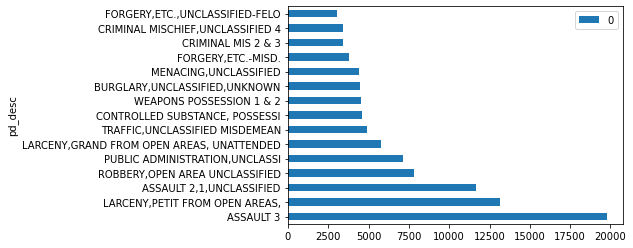

In [23]:
crimetype.sort_values(0,ascending=False).head(15).plot.barh()

Text(0, 0.5, 'No. of arrests')

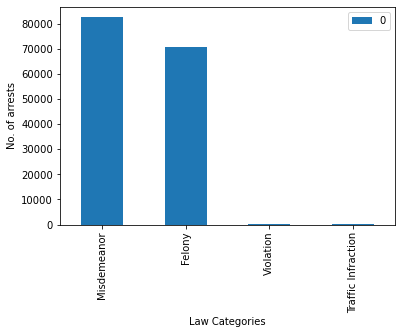

In [24]:
law_category=pd.DataFrame(data_dev.groupby(['law_cat_cd']).size())
law_cat_bar=law_category.sort_values(0,ascending=False).head(5).plot.bar()
law_cat_bar.set_xlabel("Law Categories")
law_cat_bar.set_ylabel("No. of arrests")

In [25]:
data_dev['law_cat_cd'].describe()

count          154114
unique              4
top       Misdemeanor
freq            82632
Name: law_cat_cd, dtype: object

<AxesSubplot:xlabel='jurisdiction_code'>

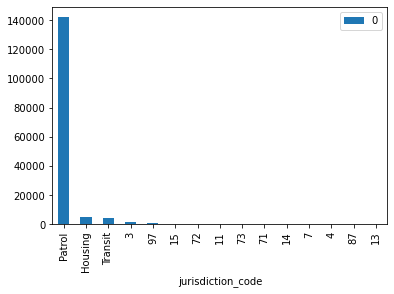

In [26]:
jurisdiction=pd.DataFrame(data_dev.groupby(['jurisdiction_code']).size())
jurisdiction.sort_values(0,ascending=False).head(15).plot.bar() # viewing the jurisdiction code data for NYC jurisdiction

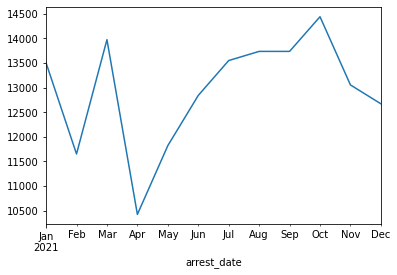

In [30]:
import matplotlib.pyplot as plt
monthly_crimes = data_dev['pd_desc'].resample('M').count()  #resample, count crimes per month
monthly_crimes.sort_index(inplace=True)
time_plot=monthly_crimes.plot().get_figure()
time_plot
time_plot.savefig('test.pdf')

# Heatmap

In [31]:
conda install -c conda-forge folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.5.0               |     pyhd8ed1ab_0          26 KB  conda-forge
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py39hf3d152e_2         145 KB  conda-forge
    folium-0.12.1.post1        |     pyhd8ed1ab_1          64 KB  conda-forge
    openssl-1.1.1o             |       h166bdaf_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTAL

In [32]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})



data = data[pd.notnull(data['latitude'])]
data = data[pd.notnull(data['longitude'])]
m = folium.Map(location=[40.7221, -73.9198], zoom_start=11)

In [33]:
# Ensure you're handing it floats
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
#heat_df = data[data['ARREST_DATE']=='2015-04-27'] # Reducing data size so it runs faster
#heat_df = data[data['OFNS_DESC']=='Homicide'] # Reducing data size so it runs faster
hm_pol = data[data['jurisdiction_code']=='Patrol']
#heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in hm_pol.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)

# Display the map
m

In [34]:
daily_crimes_sample = data_dev['ofns_desc'].resample('D').count()  #resample, count crimes per day
daily_crimes_sample.sort_index(inplace=True)

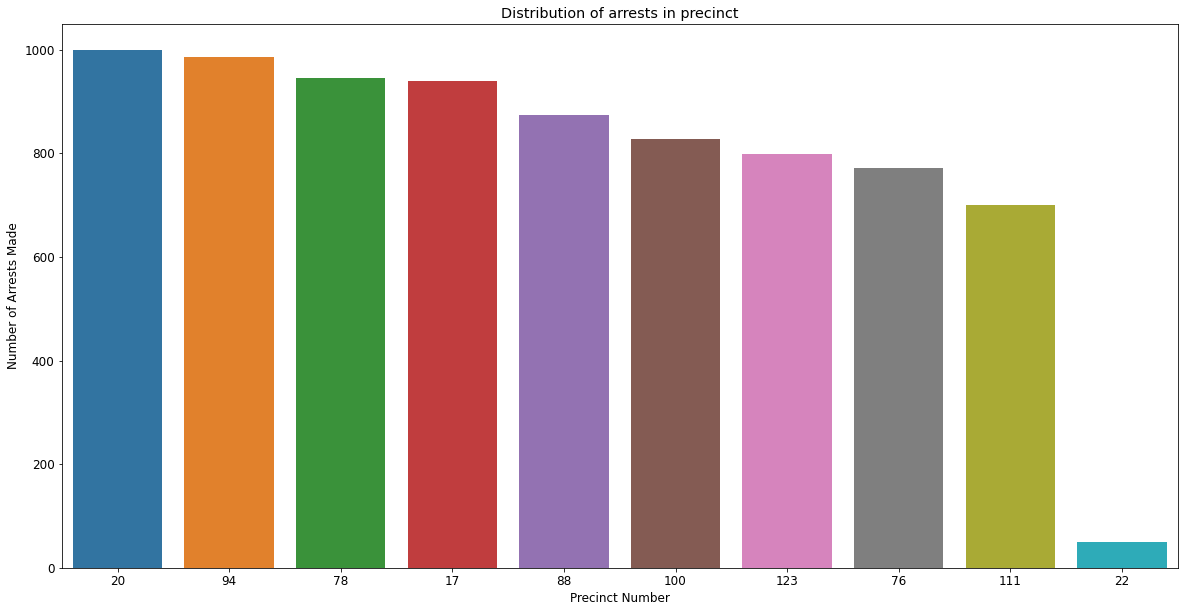

In [35]:
presc_arrest=data_dev.groupby(data_dev['arrest_precinct']).agg({'arrest_key': 'count'})
presc_arrest. rename(columns = {'arrest_key':'Total Arrests Made'}, inplace = True)
presc_arrest=presc_arrest.sort_values(by=['Total Arrests Made'], ascending=False)
presc_arrest=presc_arrest.reset_index()
presc_arrest['arrest_precinct']=presc_arrest['arrest_precinct'].apply(str)


plt.figure(figsize=(20, 10))
plt.title('Distribution of arrests in precinct')

ax = sns.barplot(x="arrest_precinct", y="Total Arrests Made", data=presc_arrest.tail(10)) 

ax.set_ylabel('Number of Arrests Made')
ax.set_xlabel('Precinct Number')
plt.show()

In [36]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('arrest counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

/tmp/ipykernel_54/1416298404.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
/tmp/ipykernel_54/1416298404.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


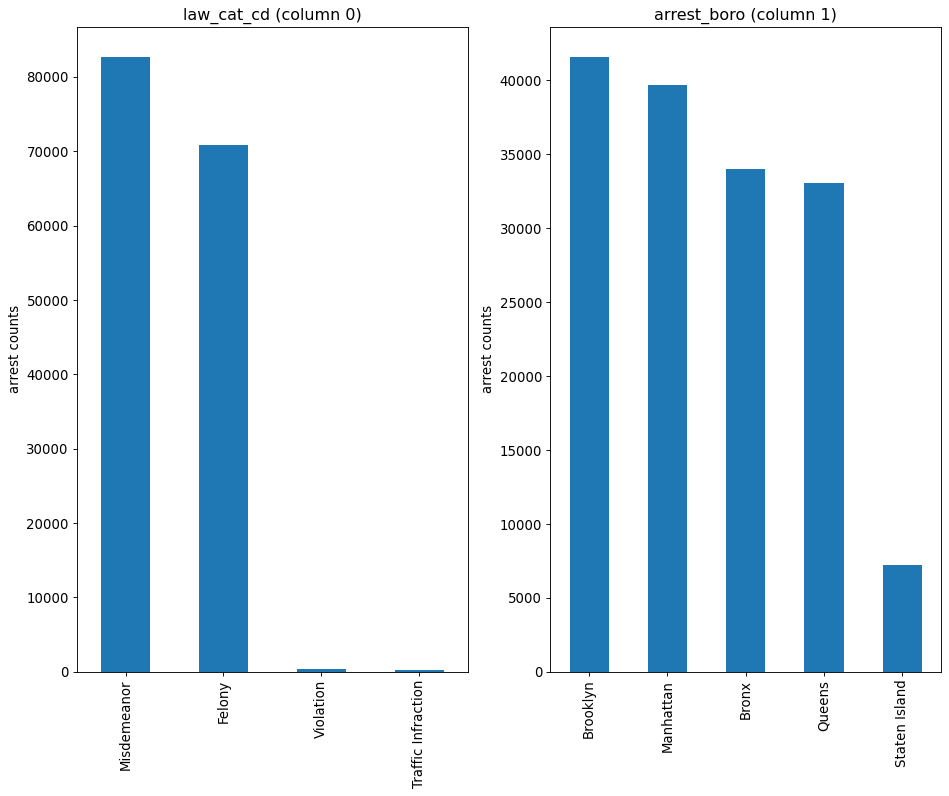

In [37]:
plotPerColumnDistribution(data, 2, 2)

Importing some more libraries required for the plots ahead

In [38]:
import scipy as sp
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

law_cat_cd     Felony  Misdemeanor  Traffic Infraction  Violation     All
arrest_boro                                                              
Bronx           14907        18685                  31         40   33663
Brooklyn        20947        20132                  36        223   41338
Manhattan       16822        22097                  88         67   39074
Queens          15111        17610                  69         52   32842
Staten Island    3080         4108                   6          3    7197
All             70867        82632                 230        385  154114


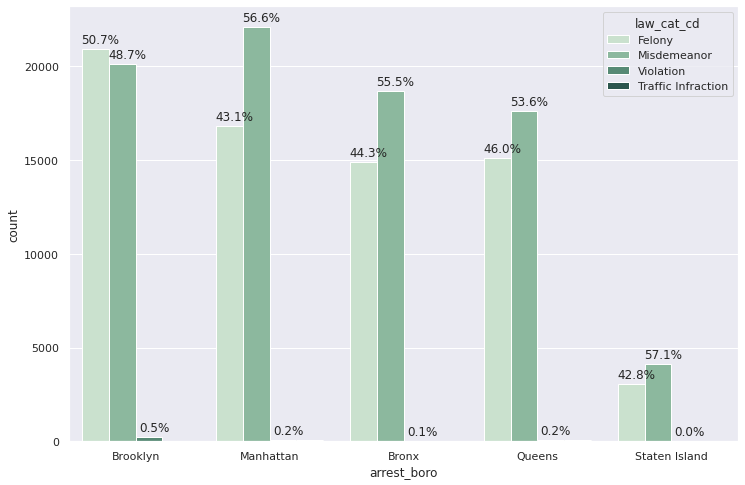

In [39]:
# tabulate a two way table with variables as boroughs and level of crime
two_way_table = pd.crosstab(index=data["arrest_boro"], columns=data["law_cat_cd"], margins=True)
print(two_way_table)

boro_name = ['MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
crime_level = ['VIOLATION', 'MISDEMEANOR', 'FELONY']
subtotal_boro = data.groupby('arrest_boro')['law_cat_cd'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="arrest_boro", hue="law_cat_cd", 
                   data=data[['arrest_boro', 'law_cat_cd']], 
                   order = subtotal_boro.index,
                  palette = "ch:2.5,-.2,dark=.3")

# boro_num = [val for val in range(0, 5) for _ in (0, 1, 2)] #[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4] not work!
boro_num2 = [val for val in range(0, 5)]*3 #[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,] work for the order
for p, i in zip(ax.patches, boro_num2):
    percent = p.get_height()/subtotal_boro[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+300), ha='center', size=12)

## Importing LA dataset

Commands to access second data set start here

In [40]:
#Defining the url for the dataset
urlds2="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/Sp22/Arrest_Data_from_2020_to_Present.csv.zip"
#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.
csvdata2=requests.get(urlds2,verify=False).content  #this will generate a warning but you can proceed

zf2 = ZipFile(BytesIO(csvdata2),'r')  #The dataset is being accessed from a zip file so this step is needed. 
#It might take a while for all of the data to be accessed. Be patient.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


# Reading and Cleaning the LA dataset

In [41]:
#Opening the dataset file and reading it into a data frame called "data2"
data2=pd.read_csv(zf2.open("Arrest_Data_from_2020_to_Present.csv"))

In [42]:
data2.head()

Report ID Report Type             Arrest Date    Time  Area ID  \
0    6115382     BOOKING  01/29/2021 12:00:00 AM  2035.0        1   
1    6303598     BOOKING  01/06/2022 12:00:00 AM  2345.0        6   
2  211218835         RFC  09/01/2021 12:00:00 AM  1230.0       12   
3  211611663         RFC  09/20/2021 12:00:00 AM  1735.0       16   
4  211911576         RFC  07/27/2021 12:00:00 AM   850.0       19   

     Area Name  Reporting District  Age Sex Code Descent Code  ...  \
0      Central                 176   36        M            H  ...   
1    Hollywood                 646   27        M            B  ...   
2  77th Street                1207   22        M            H  ...   
3     Foothill                1675   24        M            H  ...   
4      Mission                1961   51        F            H  ...   

       Disposition Description                                  Address  \
0       FELONY COMPLAINT FILED                                      7TH   
1                          NaN          CAHUENGA                     BL   
2  MISDEMEANOR COMPLAINT FILED  4700 S  VERMONT                      AV   
3  MISDEMEANOR COMPLAINT FILED  8800    SUNLAND                      BL   
4  MISDEMEANOR COMPLAINT FILED  9400 N  SEPULVEDA                    BL   

  Cross Street      LAT       LON                   Location  \
0         WALL  34.0420 -118.2485   POINT (-118.2485 34.042)   
1        SELMA  34.0998 -118.3295  POINT (-118.3295 34.0998)   
2          NaN  33.9996 -118.2915  POINT (-118.2915 33.9996)   
3          NaN   0.0000    0.0000                POINT (0 0)   
4          NaN  34.2388 -118.4677  POINT (-118.4677 34.2388)   

             Booking Date Booking Time       Booking Location  \
0  01/29/2021 12:00:00 AM       2155.0  METRO - JAIL DIVISION   
1  01/07/2022 12:00:00 AM        118.0              HOLLYWOOD   
2                     NaN          NaN                    NaN   
3                     NaN          NaN                    NaN   
4                     NaN          NaN                    NaN   

   Booking Location Code  
0                 4273.0  
1                 4206.0  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 25 columns]

In [43]:
data_la=data2 #making a copy of the dataset

In [44]:
data_la.isna().any() #checking for columns with NaN values

Report ID                   False
Report Type                 False
Arrest Date                 False
Time                         True
Area ID                     False
Area Name                   False
Reporting District          False
Age                         False
Sex Code                    False
Descent Code                False
Charge Group Code            True
Charge Group Description     True
Arrest Type Code             True
Charge                      False
Charge Description           True
Disposition Description      True
Address                     False
Cross Street                 True
LAT                         False
LON                         False
Location                    False
Booking Date                 True
Booking Time                 True
Booking Location             True
Booking Location Code        True
dtype: bool

In [45]:
data_la.isnull().sum()/len(data_la)*100 #checking nan percentages for each column

Report ID                    0.000000
Report Type                  0.000000
Arrest Date                  0.000000
Time                         0.005681
Area ID                      0.000000
Area Name                    0.000000
Reporting District           0.000000
Age                          0.000000
Sex Code                     0.000000
Descent Code                 0.000000
Charge Group Code            7.440546
Charge Group Description     7.457589
Arrest Type Code             0.000710
Charge                       0.000000
Charge Description           7.440546
Disposition Description      7.564815
Address                      0.000000
Cross Street                49.388239
LAT                          0.000000
LON                          0.000000
Location                     0.000000
Booking Date                20.298531
Booking Time                20.298531
Booking Location            20.312733
Booking Location Code       20.300661
dtype: float64

data related to booking are all irrelevant to us so we are dropping these columns, as well as the cross street column. 

In [46]:
data_la.shape

(140823, 25)

Checking the dimensions, of the rows with na values

In [47]:
print(data_la[(data_la.Time.isna())].shape)
print(data_la[(data_la['Charge Group Code'].isna())].shape)
print(data_la[(data_la['Disposition Description'].isna())].shape)
print(data_la[(data_la['Cross Street'].isna())].shape)
print(data_la[(data_la.Time.isna())].shape)
print(data_la[(data_la.Time.isna())].shape)

(8, 25)
(10478, 25)
(10653, 25)
(69550, 25)
(8, 25)
(8, 25)


In [48]:
df2=data_dev #making an extra copy for reference

We only need the data from 2021

In [49]:
data_la['Arrest Date']=pd.to_datetime(data_la['Arrest Date'])
mask=(data_la['Arrest Date'] >= '2021-1-1') & (data_la['Arrest Date'] <= '2021-12-31')
df_la=data_la.loc[mask]

In [50]:
#la dataset date range
data_la['Arrest Date']=pd.to_datetime(data_la['Arrest Date']) 

In [51]:
data_la = data_la.set_index('Arrest Date') #setting the date time as index

In [52]:
df_la.shape

(66951, 25)

In [53]:
df_la.head()

Report ID Report Type Arrest Date    Time  Area ID    Area Name  \
0    6115382     BOOKING  2021-01-29  2035.0        1      Central   
2  211218835         RFC  2021-09-01  1230.0       12  77th Street   
3  211611663         RFC  2021-09-20  1735.0       16     Foothill   
4  211911576         RFC  2021-07-27   850.0       19      Mission   
5    6270449     BOOKING  2021-10-30  1300.0        2      Rampart   

   Reporting District  Age Sex Code Descent Code  ...  \
0                 176   36        M            H  ...   
2                1207   22        M            H  ...   
3                1675   24        M            H  ...   
4                1961   51        F            H  ...   
5                 246   31        M            H  ...   

       Disposition Description                                  Address  \
0       FELONY COMPLAINT FILED                                      7TH   
2  MISDEMEANOR COMPLAINT FILED  4700 S  VERMONT                      AV   
3  MISDEMEANOR COMPLAINT FILED  8800    SUNLAND                      BL   
4  MISDEMEANOR COMPLAINT FILED  9400 N  SEPULVEDA                    BL   
5       FELONY COMPLAINT FILED                                 WILSHIRE   

  Cross Street      LAT       LON                   Location  \
0         WALL  34.0420 -118.2485   POINT (-118.2485 34.042)   
2          NaN  33.9996 -118.2915  POINT (-118.2915 33.9996)   
3          NaN   0.0000    0.0000                POINT (0 0)   
4          NaN  34.2388 -118.4677  POINT (-118.4677 34.2388)   
5        LUCAS  34.0598 -118.2734  POINT (-118.2734 34.0598)   

             Booking Date Booking Time       Booking Location  \
0  01/29/2021 12:00:00 AM       2155.0  METRO - JAIL DIVISION   
2                     NaN          NaN                    NaN   
3                     NaN          NaN                    NaN   
4                     NaN          NaN                    NaN   
5  10/30/2021 12:00:00 AM       1936.0  METRO - JAIL DIVISION   

   Booking Location Code  
0                 4273.0  
2                    NaN  
3                    NaN  
4                    NaN  
5                 4273.0  

[5 rows x 25 columns]

In [54]:
df_la = df_la.drop(columns=['Booking Date','Booking Time','Booking Location','Booking Location Code','Cross Street'])

In [55]:
df_la = df_la.drop(columns=['Charge Group Description', 'Charge Group Code']) #dropping some more columns

Renaming some columns

In [56]:
#Renaming some columns for ease of operations in future
df_la.rename(columns={'Charge Description': 'Charge_Description', 'Disposition Description': 'Disposition_Description','Sex Code': 'Sex_Code','Descent Code':'Descent_Code','Area Name':'Area_Name','Reporting District':'Reporting_District'}, inplace=True)

Replacing NA values in the 'Charge Description' columns by 'Misbehaviour' wherever it is 'Misdemeanor' in the Disposition Description

In [57]:
df_la[(df_la.Charge_Description.isna()) & (df_la['Disposition_Description'] =='MISDEMEANOR COMPLAINT FILED') ]

Report ID Report Type Arrest Date    Time  Area ID    Area_Name  \
2       211218835         RFC  2021-09-01  1230.0       12  77th Street   
3       211611663         RFC  2021-09-20  1735.0       16     Foothill   
4       211911576         RFC  2021-07-27   850.0       19      Mission   
7       210216097         RFC  2021-10-03  2210.0        2      Rampart   
10      212115329         RFC  2021-10-17  1210.0       21      Topanga   
...           ...         ...         ...     ...      ...          ...   
138280  211513262         RFC  2021-08-12  1600.0       15  N Hollywood   
138773  211513245         RFC  2021-08-12  1600.0       15  N Hollywood   
139086  211416876         RFC  2021-08-16   700.0       14      Pacific   
139583  211416878         RFC  2021-08-16   740.0       14      Pacific   
139918  211610603         RFC  2021-08-17  1400.0       16     Foothill   

        Reporting_District  Age Sex_Code Descent_Code Arrest Type Code  \
2                     1207   22        M            H                M   
3                     1675   24        M            H                M   
4                     1961   51        F            H                I   
7                      246   60        M            H                I   
10                    2125   45        F            W                I   
...                    ...  ...      ...          ...              ...   
138280                1526   39        M            H                I   
138773                1526   23        F            W                I   
139086                1412   51        M            W                I   
139583                1412   38        M            W                I   
139918                1642   47        M            W                M   

             Charge Charge_Description      Disposition_Description  \
2       104.15)B)(2                NaN  MISDEMEANOR COMPLAINT FILED   
3       104.15B2LAM                NaN  MISDEMEANOR COMPLAINT FILED   
4       41.24(A)LAM                NaN  MISDEMEANOR COMPLAINT FILED   
7          25620B&P                NaN  MISDEMEANOR COMPLAINT FILED   
10      41.45(C)LAM                NaN  MISDEMEANOR COMPLAINT FILED   
...             ...                ...                          ...   
138280      43.13.2                NaN  MISDEMEANOR COMPLAINT FILED   
138773      43.13.2                NaN  MISDEMEANOR COMPLAINT FILED   
139086  63.44I9LAMC                NaN  MISDEMEANOR COMPLAINT FILED   
139583     63.44B24                NaN  MISDEMEANOR COMPLAINT FILED   
139918  104.15B2LAM                NaN  MISDEMEANOR COMPLAINT FILED   

                                         Address      LAT       LON  \
2        4700 S  VERMONT                      AV  33.9996 -118.2915   
3        8800    SUNLAND                      BL   0.0000    0.0000   
4        9400 N  SEPULVEDA                    BL  34.2388 -118.4677   
7                                       MARYLAND  34.0608 -118.2726   
10                                       ALABAMA  34.2101 -118.5994   
...                                          ...      ...       ...   
138280  11600    VICTORY                      BL  34.1867 -118.3843   
138773  11600    VICTORY                      BL  34.1867 -118.3843   
139086                                      ROSE  33.9949 -118.4801   
139583           OCEAN FRONT                  WK  33.9933 -118.4765   
139918  13300    GAGER                        ST  34.2575 -118.4249   

                         Location  
2       POINT (-118.2915 33.9996)  
3                     POINT (0 0)  
4       POINT (-118.4677 34.2388)  
7       POINT (-118.2726 34.0608)  
10      POINT (-118.5994 34.2101)  
...                           ...  
138280  POINT (-118.3843 34.1867)  
138773  POINT (-118.3843 34.1867)  
139086  POINT (-118.4801 33.9949)  
139583  POINT (-118.4765 33.9933)  
139918  POINT (-118.4249 34.2575)  

[4828 rows x 18 columns]

In [58]:
df_la.loc[(df_la.Charge_Description.isna()) & (df_la['Disposition_Description'] =='MISDEMEANOR COMPLAINT FILED'), 'Charge_Description'] = 'MISBEHAVIOUR'

Replacing NA values for charge description with 'UNKNOWN' for thos entries where Disposition_Description is NA too.

In [59]:
df_la.loc[(df_la.Charge_Description.isna()) & (df_la.Disposition_Description.isna()), 'Charge_Description'] = 'UNKNOWN'

Replacing the NA values for charge description with 'UNKNOWN' for all the remaining rows with NA values. 

In [60]:
df_la.loc[(df_la.Charge_Description.isna()),'Charge_Description']='UNKNOWN'

In [61]:
sum(df_la.Charge_Description.isna()) #charge description column is cleaned. 

0

In [62]:
df_la.head()

Report ID Report Type Arrest Date    Time  Area ID    Area_Name  \
0    6115382     BOOKING  2021-01-29  2035.0        1      Central   
2  211218835         RFC  2021-09-01  1230.0       12  77th Street   
3  211611663         RFC  2021-09-20  1735.0       16     Foothill   
4  211911576         RFC  2021-07-27   850.0       19      Mission   
5    6270449     BOOKING  2021-10-30  1300.0        2      Rampart   

   Reporting_District  Age Sex_Code Descent_Code Arrest Type Code  \
0                 176   36        M            H                F   
2                1207   22        M            H                M   
3                1675   24        M            H                M   
4                1961   51        F            H                I   
5                 246   31        M            H                F   

        Charge Charge_Description      Disposition_Description  \
0        459PC           BURGLARY       FELONY COMPLAINT FILED   
2  104.15)B)(2       MISBEHAVIOUR  MISDEMEANOR COMPLAINT FILED   
3  104.15B2LAM       MISBEHAVIOUR  MISDEMEANOR COMPLAINT FILED   
4  41.24(A)LAM       MISBEHAVIOUR  MISDEMEANOR COMPLAINT FILED   
5        459PC           BURGLARY       FELONY COMPLAINT FILED   

                                   Address      LAT       LON  \
0                                      7TH  34.0420 -118.2485   
2  4700 S  VERMONT                      AV  33.9996 -118.2915   
3  8800    SUNLAND                      BL   0.0000    0.0000   
4  9400 N  SEPULVEDA                    BL  34.2388 -118.4677   
5                                 WILSHIRE  34.0598 -118.2734   

                    Location  
0   POINT (-118.2485 34.042)  
2  POINT (-118.2915 33.9996)  
3                POINT (0 0)  
4  POINT (-118.4677 34.2388)  
5  POINT (-118.2734 34.0598)

# Basic Comparison between LA and NYC crimes

## LA top 5 crimes

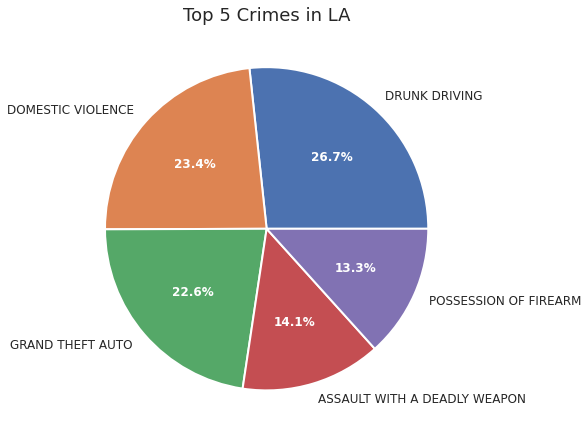

In [63]:
x=df_la['Charge_Description'].value_counts().head(5)
labels=['DRUNK DRIVING','DOMESTIC VIOLENCE','GRAND THEFT AUTO','ASSAULT WITH A DEADLY WEAPON','POSSESSION OF FIREARM']
fig, ax = plt.subplots(figsize=(8, 8))

# Capture each of the return elements.
patches, texts, pcts = ax.pie(
    x,labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 'large'})
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Top 5 Crimes in LA', fontsize=18)
plt.tight_layout()

## NYC top 5 crimes

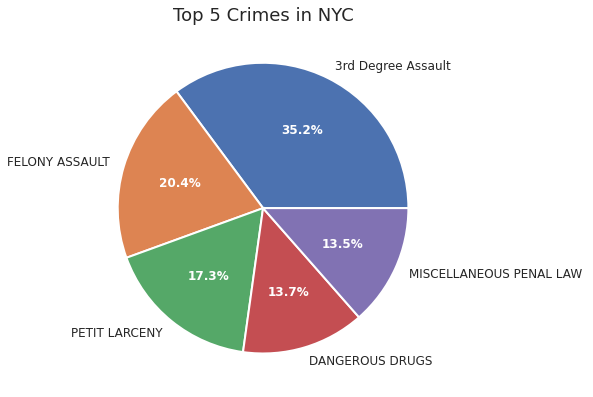

In [64]:
x_nyc=data_dev['ofns_desc'].value_counts().head(5)
labels=['3rd Degree Assault','FELONY ASSAULT','PETIT LARCENY','DANGEROUS DRUGS ','MISCELLANEOUS PENAL LAW ']
fig, ax = plt.subplots(figsize=(8, 8))

# Capture each of the return elements.
patches, texts, pcts = ax.pie(
    x_nyc,labels=labels ,autopct='%.1f%%',
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 'large'})
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Top 5 Crimes in NYC', fontsize=18)
plt.tight_layout()

## Comparison of arrests made according to age and sex for NYC

In [65]:
test_df=data_dev #making a new copy to use for pivotting the original dataframe

In [66]:
test_1_df=test_df.groupby(['age_group','perp_sex']).count() #grouping by age and sex for visualization

In [67]:
stacked_df=test_1_df.iloc[:,0:1] #subsetting the dataframe above

In [68]:
pivot_stacked = pd.pivot_table(data=stacked_df, index=['age_group'], columns=['perp_sex']) #creating a pivot table

<AxesSubplot:title={'center':'Arrests according to age group and sex'}, xlabel='age_group'>

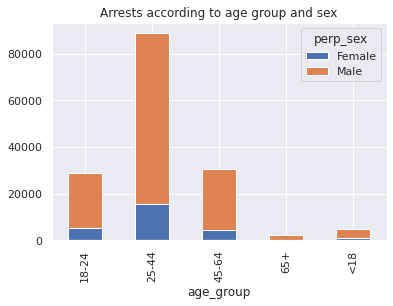

In [69]:
pivot_stacked.plot.bar(y='arrest_key',stacked=True,title='Arrests according to age group and sex') #visualizing

## Comparison of arrests made according to age and sex for LA

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


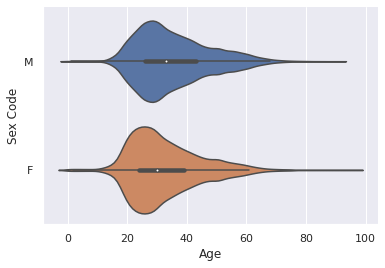

In [70]:
import seaborn as sns 
sns.violinplot(data2['Age'], data2['Sex Code'],invert=False) #Variable Plot
sns.despine()

# FIN